## Using `polars`, `pandas`, and `seaborn` to run an EDA on the pima diabetes data set

In [1]:
import polars as pl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from jmspack.utils import apply_scaling
import session_info

In [12]:
if "jms_style_sheet" in plt.style.available:
    plt.style.use("jms_style_sheet")

In [2]:
session_info.show(write_req_file=False)

In [3]:
csv_url = "https://raw.githubusercontent.com/jameshtwose/example_deliverables/main/classification_examples/pima_diabetes/diabetes.csv"
df=pl.read_csv(csv_url)

In [4]:
df.shape

(768, 9)

In [5]:
df.head()

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
i64,i64,i64,i64,i64,f64,f64,i64,i64
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1


In [6]:
len(df.columns)
# np.array(df.columns), np.array(df.dtypes)
df.null_count()

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0


In [7]:
target="Outcome"

In [8]:
df.describe()

describe,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
str,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",768.0,768.0,768.0,768.0,768.0,768.0,768.0,768.0,768.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
"""std""",3.369578,31.972618,19.355807,15.952218,115.244002,7.88416,0.331329,11.760232,0.476951
"""min""",0.0,0.0,0.0,0.0,0.0,0.0,0.078,21.0,0.0
"""max""",17.0,199.0,122.0,99.0,846.0,67.1,2.42,81.0,1.0
"""median""",3.0,117.0,72.0,23.0,30.5,32.0,0.3725,29.0,0.0


In [19]:
df[target].value_counts()

Outcome,counts
i64,u32
0,500
1,268


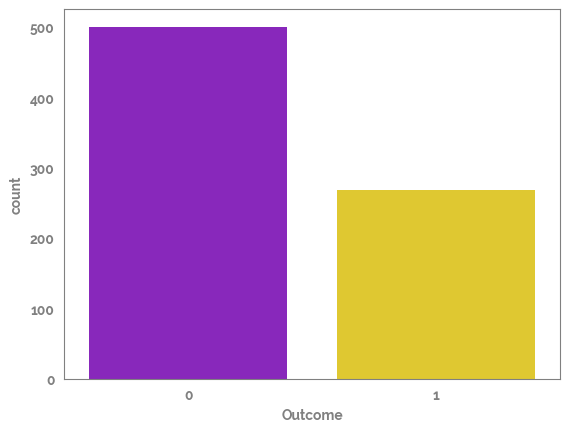

In [13]:
plot_df = df.to_pandas()
_ = sns.countplot(x=plot_df[target])

In [9]:
# df.select([pl.col("^run_trial|run$")])
# df.fill_null()

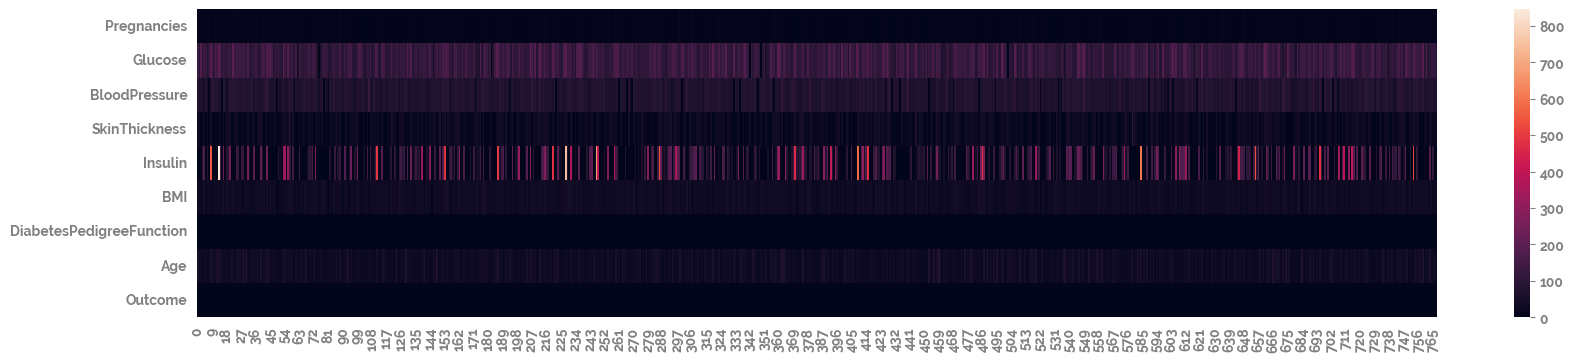

In [14]:
_ = plt.figure(figsize=(20, 4))
_ = sns.heatmap(plot_df.T)

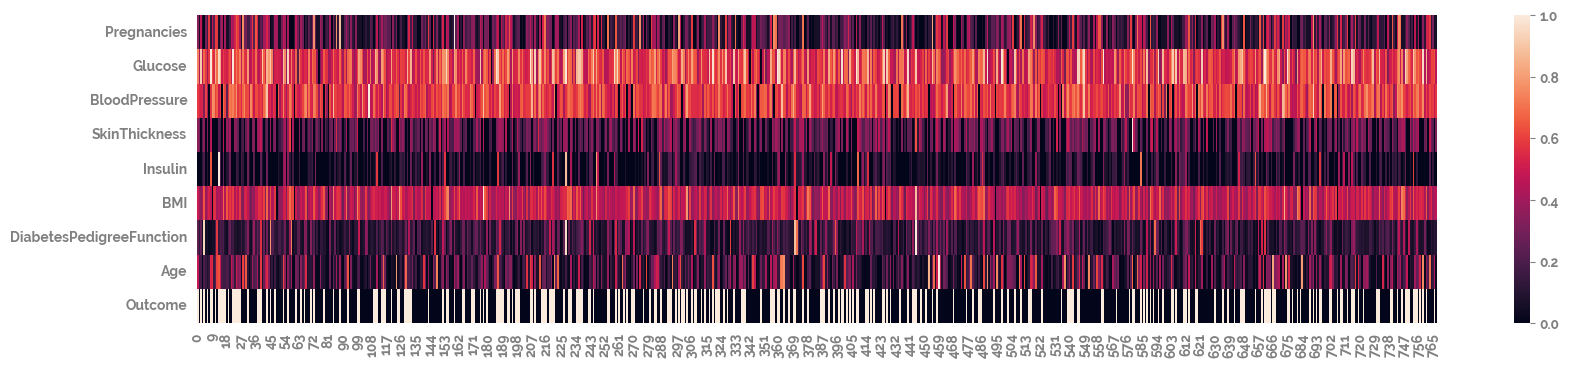

In [15]:
_ = plt.figure(figsize=(20, 4))
_ = sns.heatmap(plot_df
                .pipe(apply_scaling)
                .T)

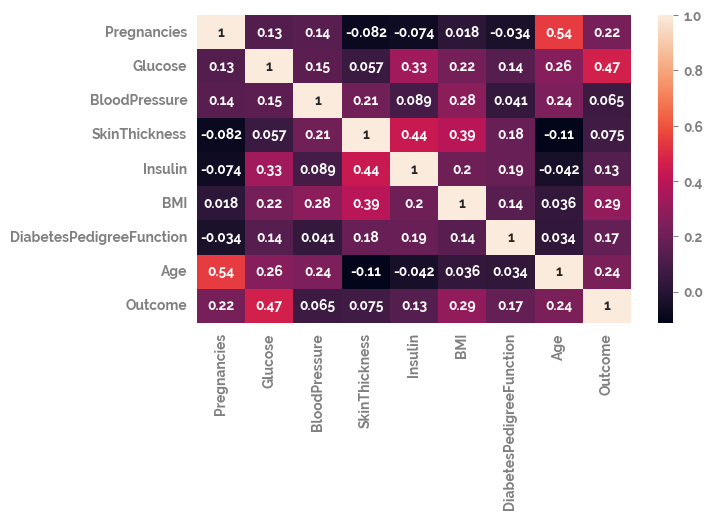

In [16]:
_ = plt.figure(figsize=(7, 4))
_ = sns.heatmap(plot_df.corr(), annot=True)

In [24]:
pl.pearson_corr(a=df.select([pl.col("Glucose")]), 
                b=df.select([pl.col("BMI")]),
                ddof=1)

AttributeError: 'DataFrame' object has no attribute '_pyexpr'